In [1]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:41753")
client

<Client: 'tcp://127.0.0.1:41753' processes=4 threads=16, memory=251.68 GiB>

In [2]:
import numpy as np
import xarray as xr
import os.path as op
import os
import sys
from xgcm.grid import Grid
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ddir = '/nexsan/people/abozec/BB86/'
nexs = '/nexsan/people/tuchida/'

In [4]:
pdir = op.join(nexs,'BB86_PACKAGE/PYTHON/')
sys.path.insert(0, pdir)
sys.path

['/nexsan/people/tuchida/BB86_PACKAGE/PYTHON/',
 '/home/tuchida/Notebooks/SW_Alex',
 '/home/tuchida/.conda/envs/py310/lib/python310.zip',
 '/home/tuchida/.conda/envs/py310/lib/python3.10',
 '/home/tuchida/.conda/envs/py310/lib/python3.10/lib-dynload',
 '',
 '/home/tuchida/.conda/envs/py310/lib/python3.10/site-packages']

In [5]:
from hycom.info import read_field_names, read_field_grid_names
from hycom.io import read_hycom_fields, read_hycom_grid, sub_var2

In [6]:
## size of the domain
idm = 201 ; jdm = 201  ## size of the domain
kdm = 2                ##  number of layer in bb86
dp0 = 1000.             ## thickness of the first layer (m)
tdm = 1800             ## 12 month climatology
# tplot1 = 1800 ; tplot2 = 1800 ## time-stamp to plot (starts from 1)

normeref_hyc=0.05      ## vector norm of HYCOM-BB86 (in m/s)
onevectout = 2         ## plot one vector out of 'onevectorout'
min_dp = -450. ;  max_dp = 450. ## layer thickness anomaly in m (min and max)

## constants
rho0 = 1000.    ## reference density
g = 9.806      ## gravity
oneta = 1.
montg_c = 0.

In [7]:
##  READ the HYCOM files
dir10 = op.join(ddir,'expt_22.3/DAILY/')

In [8]:
fName = op.join(dir10,'restart_00200101.a')
fName

'/nexsan/people/abozec/BB86/expt_22.3/DAILY/restart_00200101.a'

In [14]:
psikk = sub_var2(fName, idm, jdm, 31)
print(psikk.min(), psikk.max())

-2.072573184967041 0.0


In [15]:
thkk = sub_var2(fName, idm, jdm, 32)
print(thkk.min(), thkk.max())

0.0 0.12135999649763107


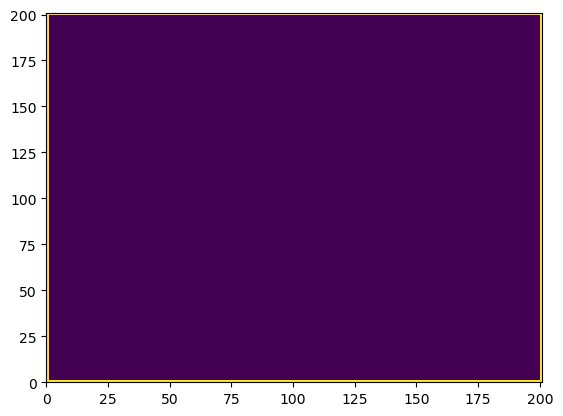

In [16]:
plt.pcolormesh(psikk)